Student Name: Joel Amarou Heuer

Student ID: 202102201

# Imports

In [3]:
import numpy as np
import pandas as pd
import warnings
import nltk # for tokenization use nltk
nltk.download('punkt')
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to /home/korosu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# (Hyper-)Parameter

In [4]:
# Hyperparameters
output_size = 1 # since it is regression problem, only 1 output neuron
learning_rate = 0.01
number_of_epochs = 1 # how is every sample used for pass/forward/backward

# Parameters
train_data_path = "./data/drugLibTrain_raw.tsv" # please use relative path like this
test_data_path = "./data/drugLibTest_raw.tsv" # please use relative path like this

# Main

In [5]:
input_features =  'commentsReview'

###########################################
################ Load Data ################
###########################################
# load data
train_data = pd.read_csv(train_data_path, sep='\t')
test_data = pd.read_csv(test_data_path, sep='\t')
# drop nans
train_data.dropna(subset = [input_features], inplace=True)
test_data.dropna(subset = [input_features], inplace=True)
# lowercase all comments
train_data[input_features] = train_data[input_features].str.lower()
test_data[input_features] = test_data[input_features].str.lower()

In [6]:
############################################################
################ Create directory for words ################
############################################################
# merge data
df_data =  pd.concat([train_data,test_data], axis=0)
# create dictonary
dictonary_words = df_data["commentsReview"].apply(nltk.word_tokenize)
dictonary_words = dictonary_words.values.tolist()
# flat lists
dictonary_words = [item for sublist in dictonary_words for item in sublist]
# drop duplicates
dictonary_words = list(set(dictonary_words))
# number of all words
dict_size = len(dictonary_words)

print(f"Number of words {dict_size}")

Number of words 11584


In [7]:
##############################################
################ Tokenization ################
##############################################
train_data_tokenized:pd.DataFrame = train_data["commentsReview"].apply(nltk.word_tokenize)
test_data_tokenized:pd.DataFrame = test_data["commentsReview"].apply(nltk.word_tokenize)

In [8]:
##############################################################
################ Word Encoding (Bag of words) ################
##############################################################
def to_bow(dataset):
    '''
    @param dataset which should be considered (train or test)
    @return new column for dataset with sentence/word-encoded cells

    For each cell in column of interest, following is performed:
    (1) cell contains sentence
    (2) sentence is tokenized --> produces array of words/tokens
    (3) create array A with len(dict_size) 
    (4) for each token count occurance 
    (5) A[index of token t in dict] = occurance of t
    '''
    new_col = []

    # for each row
    for _, row in dataset.iterrows():
        tokenized = nltk.word_tokenize(row[input_features])
        array = np.zeros(shape=dict_size)

        # for each word in a setence
        for word in tokenized:
            i_hot = dictonary_words.index(word)
            array[i_hot] = array[i_hot] + 1
        new_col.append(array)
    
    return new_col


test_data[input_features] =  to_bow(test_data)
train_data[input_features] =  to_bow(train_data)
train_data.sample(2)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
1078,1856,augmentin,3,Moderately Effective,No Side Effects,tonsilitis,Cleared up most of the symptoms for the 10 day...,None. Actually felt pretty good compared to of...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1641,2279,lexapro,7,Considerably Effective,Moderate Side Effects,depression/anxiety,Depression lessened considerably after 6-8 wee...,Several side effects when initially starting t...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [9]:
def loss_function(y_actual, y_pred):
	'''	calculate squared errorr'''
	return (y_actual-y_pred)**2


def derivation_of_loss_function(y_actual, y_pred):
	'''derivative of squared error'''
	return -2*(y_actual-y_pred)


def activation_function(z):
	'''
	sigmoid-function is used as activation function for hidden-layers
	'''
	return 1/(1 + np.exp(-z))

def reLU(z):
    '''
	reLU is used as activation for output-layer
	'''
    return np.maximum(0.0, z)

def forward_pass(data):
	# Input --> Hidden-1
	z0 = np.dot(data, w_b['L0_w'].T) + w_b['L0_b'].T
	a0 = activation_function(z0)

	# Hidden-1 --> Hidden-2
	z1 = np.dot(a0, w_b['L1_w'].T) + w_b['L1_b'].T
	a1 = activation_function(z1)


	# LayerHidden2 --> LayerOutput
	z2 = np.dot(a1, w_b['L2_w'].T) + w_b['L2_b'].T
	y_pred = reLU(z2)

	results={
		"a0": a0,
		"a1": a1,
		"y_pred": y_pred[0][0],
	}
	return results

###########################################################


def backward_pass(input_data, forward_results, loss):
	'''calculate error and update weights'''
	
	delta_output = loss
	w_b['L2_w'] -= learning_rate * np.dot(delta_output.T, forward_results['a1']) 
	w_b['L2_b'] -= learning_rate * np.sum(delta_output, keepdims=True)

	delta_z2 = np.dot(delta_output, w_b['L2_w'])
	delta_a1 = delta_z2 * derivation_of_activation_function(forward_results['a1'])
	w_b['L1_w'] -= learning_rate * np.dot(delta_a1.T, forward_results['a0']) 
	w_b['L1_b'] -= learning_rate * np.sum(delta_a1, keepdims=True)

	delta_z1 = np.dot(delta_a1, w_b['L1_w'])
	delta_a0 = delta_z1 * derivation_of_activation_function(forward_results['a0'])


	w_b['L0_w'] -= learning_rate * np.dot(delta_a0.T, np.array([input_data]))
	w_b['L1_b'] -= learning_rate * np.sum(delta_a0, keepdims=True)
	pass


def derivation_of_activation_function(x):
	'''derivation of sigmoid'''
	return activation_function(x) * (1 - activation_function(x))


def train(train_data, train_labels, valid_data, valid_labels):
	losses =[]
	for epoch in range(number_of_epochs):
		index = 0

		# Same thing about [hidden_layers] mentioned above is valid here also
		for encoded_sentence, y_rating in zip(train_data, train_labels):
			forward_results = forward_pass(encoded_sentence)
			derivation = derivation_of_loss_function(y_rating, forward_results["y_pred"])
			backward_pass(encoded_sentence , forward_results, derivation)
			loss = loss_function(y_rating, forward_results["y_pred"])
			if index % 400 == 0: # at each 400th sample, we run validation set to see our model's improvements
				loss = test(valid_data, valid_labels)
				losses.append(loss)
				print(f"Epoch= {epoch}, Coverage={round(100*(index/len(train_data)),2)}%, Loss= {round(loss,2)}")

			index += 1

	return losses



def test(test_data, test_y_ratings):
	avg_loss = 0
	predictions = []
	labels = []

	for encoded_sentence, y_rating in zip(test_data, test_y_ratings):
		forward_results = forward_pass(encoded_sentence)
		predictions.append(forward_results["y_pred"])
		labels.append(y_rating)
		avg_loss += np.sum(loss_function(y_rating, forward_results["y_pred"]))

	return avg_loss / len(test_data)

In [13]:
#################################################
################ Create datasets ################
#################################################
# split into train & test    and    feature & y columns
train_x = train_data[input_features]
train_y = train_data['rating']
test_x = test_data[input_features]
test_y = test_data['rating']


##################################################################
################ split into validation & training ################
##################################################################
# Split training data into [a] Training (75%) and [b] validation (25%)
valid_x = np.asarray(train_x[int(0.75*len(train_x)):-1])
valid_y = np.asarray(train_y[int(0.75*len(train_y)):-1])
train_x = np.asarray(train_x[0:int(0.75*len(train_x))])
train_y = np.asarray(train_y[0:int(0.75*len(train_y))])

# Hyperparamater
num_neurons_in_h1 = 33
num_neurons_in_h2 = 3


w_b = {
    # Input-Layer -> H1
    "L0_w" : np.random.randn(num_neurons_in_h1, dict_size) , 
    "L0_b": np.ones((num_neurons_in_h1, 1)) * 0.01,

    # H1 -> H2
    "L1_w" : np.random.randn(num_neurons_in_h2, num_neurons_in_h1), 
    "L1_b": np.ones((num_neurons_in_h2, 1)) * 0.01,

    # H2 -> Output-Layer
    "L2_w" : np.random.randn(output_size, num_neurons_in_h2), 
    "L2_b": np.ones((output_size, 1)) * 0.01,
}


#######################################
################ train ################
#######################################
list_losses= train(train_x, train_y, valid_x, valid_y)

Epoch= 0, Coverage=0.0%, Loss= 53.07
Epoch= 0, Coverage=17.21%, Loss= 10.16
Epoch= 0, Coverage=34.42%, Loss= 9.44
Epoch= 0, Coverage=51.64%, Loss= 9.48
Epoch= 0, Coverage=68.85%, Loss= 9.22
Epoch= 0, Coverage=86.06%, Loss= 9.18


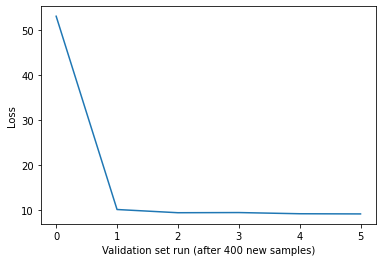

In [14]:
import matplotlib.pyplot as plt

x = range(0,len(list_losses))
y = list_losses

plt.xlabel("Validation set run (after 400 new samples)")
plt.ylabel("Loss")
plt.plot(x,y)

In [15]:
test(test_x, test_y)

8.97200182883319